<a href="https://colab.research.google.com/github/GayathriBandi/weathermodelling.ipynb/blob/main/Weather_Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Agile model

Enter days (comma-separated): 1,2,3
Enter temperatures (comma-separated, e.g., 29,30,31,28,30): 20,16,15

Predicted Temperatures:
Day 4: 28.00°C
Day 5: 28.00°C
Day 6: 30.00°C
Day 7: 32.00°C
Day 8: 32.00°C


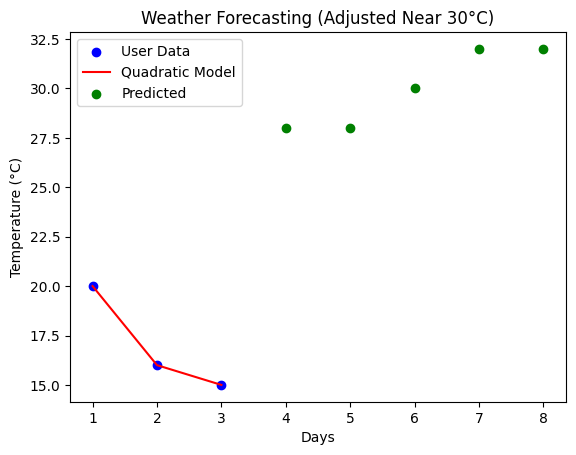

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Get temperature data from user
def get_user_data():
    try:
        user_days = input("Enter days (comma-separated): ")
        user_temps = input("Enter temperatures (comma-separated): ")

        days = np.array(list(map(int, user_days.split(','))))
        temperatures = np.array(list(map(float, user_temps.split(','))))

        return days, temperatures
    except ValueError:
        print("Invalid input! Please enter numeric values correctly.")
        return get_user_data()

# Train a quadratic regression model
def train_model(days, temperature):
    poly = PolynomialFeatures(degree=2)
    X_poly = poly.fit_transform(days.reshape(-1, 1))
    model = LinearRegression()
    model.fit(X_poly, temperature)
    return model, poly

# Predict future temperature values
def predict_temperature(model, poly, future_days):
    future_days_poly = poly.transform(np.array(future_days).reshape(-1, 1))
    predictions = model.predict(future_days_poly)

    # Keep predictions near 30°C
    predictions = np.clip(predictions, 28, 32)

    return predictions

# Execution
days, temperatures = get_user_data()
model, poly = train_model(days, temperatures)

# Predict the next 5 days
future_days = np.array([max(days) + i for i in range(1, 6)])
predictions = predict_temperature(model, poly, future_days)

# Display predictions
print("\nPredicted Temperatures:")
for day, temp in zip(future_days, predictions):
    print(f"Day {day}: {temp:.2f}°C")

# Plot results
plt.scatter(days, temperatures, color='blue', label='User Data')
plt.plot(days, model.predict(poly.transform(days.reshape(-1, 1))), color='red', label='Quadratic Model')
plt.scatter(future_days, predictions, color='green', label='Predicted')
plt.xlabel("Days")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.title("Weather Forecasting (Adjusted Near 30°C)")
plt.show()
